In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [21]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    ])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


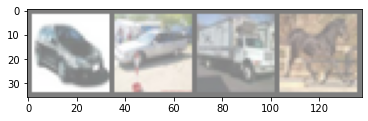

  car   car truck horse


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [23]:
images[0].shape

torch.Size([3, 32, 32])

In [24]:
import math
import torch.nn as nn


In [66]:
def get_gaussian_kernel(kernel_size=3, sigma=2, channels=3):
    # Create a x, y coordinate grid of shape (kernel_size, kernel_size, 2)
    x_coord = torch.arange(kernel_size)
    x_grid = x_coord.repeat(kernel_size).view(kernel_size, kernel_size)
    y_grid = x_grid.t()
    xy_grid = torch.stack([x_grid, y_grid], dim=-1).float()

    mean = (kernel_size - 1)/2.
    variance = sigma**2.

    # Calculate the 2-dimensional gaussian kernel which is
    # the product of two gaussian distributions for two different
    # variables (in this case called x and y)
    gaussian_kernel = (1./(2.*math.pi*variance)) *\
                      torch.exp(
                          -torch.sum((xy_grid - mean)**2., dim=-1) /\
                          (2*variance)
                      )

    # Make sure sum of values in gaussian kernel equals 1.
    gaussian_kernel = gaussian_kernel / torch.sum(gaussian_kernel)

    # Reshape to 2d depthwise convolutional weight
    gaussian_kernel = gaussian_kernel.view(1, 1, kernel_size, kernel_size)
    gaussian_kernel = gaussian_kernel.repeat(channels, 1, 1, 1)

    gaussian_filter = nn.Conv2d(in_channels=channels, out_channels=channels,
                                kernel_size=kernel_size, groups=channels,padding=kernel_size//2, bias=False)

    gaussian_filter.weight.data = gaussian_kernel
    gaussian_filter.weight.requires_grad = False
    
    return gaussian_filter

In [67]:
kernel=get_gaussian_kernel()

In [68]:
param_val=1

In [69]:
param_list=[7,5,3,,-3,-5,-7]

SyntaxError: invalid syntax (<ipython-input-69-bbb2904dbb25>, line 1)

In [ ]:
abs(gaussian_images)
if param>0:
    
else:
    

In [51]:
images.shape

torch.Size([4, 3, 32, 32])

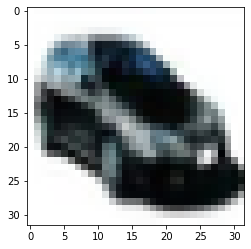

In [52]:
plt.imshow(transforms.ToPILImage()(images[0]))

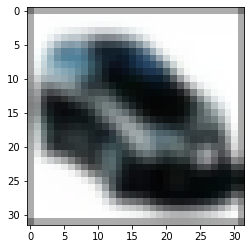

In [53]:
plt.imshow(transforms.ToPILImage()(gaussian_images[0]))

In [54]:
edge_img=images-gaussian_images

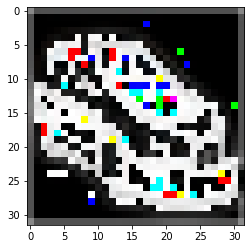

In [55]:
plt.imshow(transforms.ToPILImage()(edge_img[0]))

In [70]:
import os
import cv2
import copy
import time
import glob
import random
import datetime
import numpy as np
import pandas as pd
import skimage.io as io
import matplotlib.pyplot as plt
from collections import Counter
from tqdm.notebook import tqdm
from pycocotools.coco import COCO
import sys
sys.path
sys.path.append('../')
print(sys.path)
import pprint
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms as T

import skimage.io
import skimage.transform
import skimage.color
import skimage



['C:\\Users\\HyunSeung\\Documents\\GitHub\\Highly-Cluttered-Dataset\\metric_hyun', 'C:\\Users\\HyunSeung\\Anaconda3\\python37.zip', 'C:\\Users\\HyunSeung\\Anaconda3\\DLLs', 'C:\\Users\\HyunSeung\\Anaconda3\\lib', 'C:\\Users\\HyunSeung\\Anaconda3', '', 'C:\\Users\\HyunSeung\\Anaconda3\\lib\\site-packages', 'C:\\Users\\HyunSeung\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\HyunSeung\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\HyunSeung\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\HyunSeung\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\HyunSeung\\.ipython', '../']


In [72]:
from pycocotools.coco import COCO
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [73]:
root_img_path="D:/Dataset/Coco/val2014/"
valid_set=COCO('D:/Dataset/Coco/annotations/instances_val2014.json')

loading annotations into memory...
Done (t=5.51s)
creating index...
index created!


In [74]:
cats = valid_set.loadCats(valid_set.getCatIds()) 
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms))) 
nms = set([cat['supercategory'] for cat in cats]) 
print('COCO supercategories: \n{}'.format(' '.join(nms)))
from tqdm import tqdm


COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
person vehicle sports kitchen animal food indoor outdoor appliance electronic furniture accessory


In [75]:
def get_meta(coco):
    ids = list(coco.imgs.keys())
    for i, img_id in enumerate(ids):
        img_meta = coco.imgs[img_id]
        ann_ids = coco.getAnnIds(imgIds=img_id)
        # basic parameters of an image
        img_file_name = img_meta['file_name']
        w = img_meta['width']
        h = img_meta['height']
        # retrieve metadata for all persons in the current image
        anns = coco.loadAnns(ann_ids)

        yield [img_id, img_file_name, w, h, anns]

# iterate over images
keypoints={}
for img_id, img_fname, w, h, meta in get_meta(valid_set):
    # iterate over all annotations of an image
    keypoints[img_fname]=[]
    for m in meta:
        # m is a dictionary
        img=img
        keypoints[img_fname].append([COCO_INSTANCE_CATEGORY_NAMES[m['category_id']],m['bbox']])


In [97]:
plt.figure()
img_fname=list(keypoints.keys())[0]
img = cv2.imread(os.path.join(root_img_path,img_fname))  # Read image with cv2
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

# for n, (category,bbox)  in enumerate(keypoints[list(keypoints.keys())[0]]):
#     print(f"[{n+1:2d}] {category:20s}")
#     box_color = (0, 0, 0)
#     cv2.rectangle(img,
#                   (int(bbox[0]), int(bbox[1])),
#                   (int(bbox[0]+int(bbox[2])),
#                    (int(bbox[1])+int(bbox[3]))),
#                   color=box_color, thickness=2)

#     cv2.putText(img, f"[{n:2d}] "+category, (int(bbox[0]), int(bbox[1])),
#                 cv2.FONT_HERSHEY_SIMPLEX, 0.8, color=box_color, thickness=2) 
    
# plt.imshow(img)

<Figure size 432x288 with 0 Axes>

In [103]:
img_tensor=transforms.Compose([transforms.ToPILImage(),transforms.Resize((224,224)),transforms.ToTensor()])(img)

In [104]:
img_tensor.shape

torch.Size([3, 224, 224])

In [105]:
img_tensor=img_tensor.unsqueeze(0)

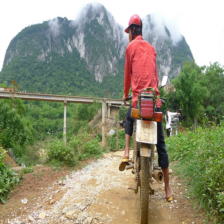

In [106]:
transforms.ToPILImage()(img_tensor[0])

In [107]:
param_list=[17,15,13,11,15,11,7,3,-3,-5,-7,-9,-11,-13,-15,-17,-19]

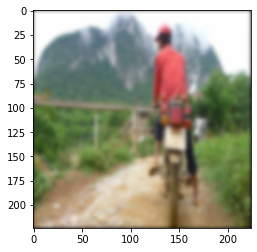

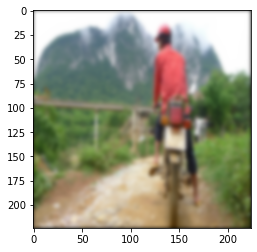

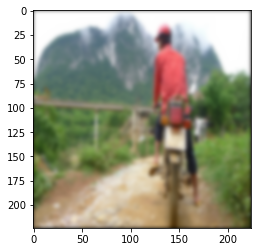

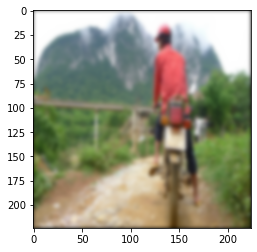

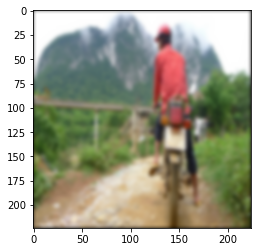

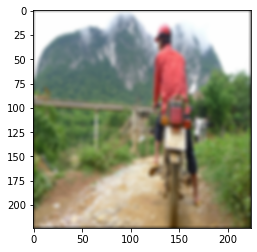

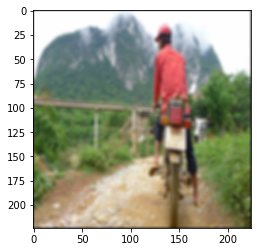

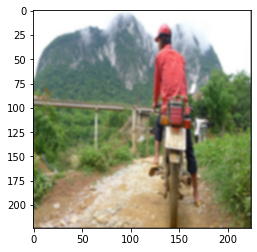

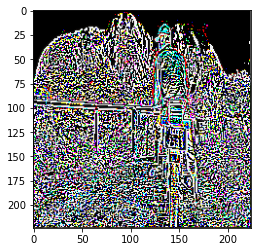

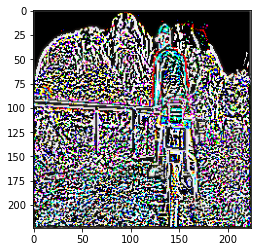

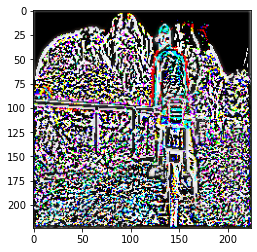

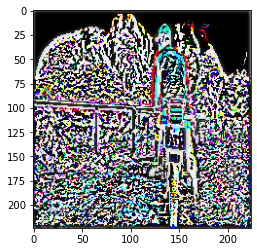

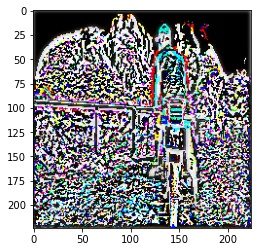

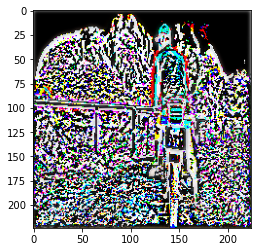

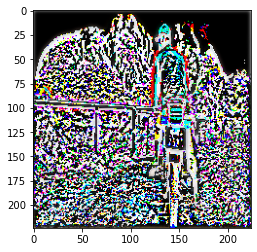

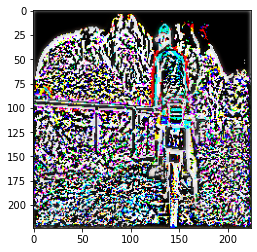

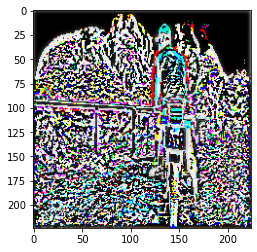

In [108]:
for x in param_list:
    kernel=get_gaussian_kernel(kernel_size=abs(x))
    kernel_img=kernel(img_tensor)
    if x<0:
        kernel_img=img_tensor-kernel_img
    plt.figure()
    plt.imshow(transforms.ToPILImage()(kernel_img[0]))
    

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
for epoch in range(30):  # loop over the dataset multiple times
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to(device)
        labels=labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    net.eval()
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images=images.to(device)
            labels=labels.to(device)
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))
print('Finished Training')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}





[1,  2000] loss: 2.186
[1,  4000] loss: 1.869
[1,  6000] loss: 1.704
[1,  8000] loss: 1.603
[1, 10000] loss: 1.547
[1, 12000] loss: 1.486
Accuracy of the network on the 10000 test images: 45 %
[2,  2000] loss: 1.436
[2,  4000] loss: 1.403
[2,  6000] loss: 1.373
[2,  8000] loss: 1.365
[2, 10000] loss: 1.339
[2, 12000] loss: 1.299
Accuracy of the network on the 10000 test images: 52 %
[3,  2000] loss: 1.262
[3,  4000] loss: 1.228
[3,  6000] loss: 1.228
[3,  8000] loss: 1.223
[3, 10000] loss: 1.227
[3, 12000] loss: 1.211
Accuracy of the network on the 10000 test images: 57 %
[4,  2000] loss: 1.141
[4,  4000] loss: 1.130
[4,  6000] loss: 1.149
[4,  8000] loss: 1.150
[4, 10000] loss: 1.124
[4, 12000] loss: 1.118
Accuracy of the network on the 10000 test images: 57 %
[5,  2000] loss: 1.053
[5,  4000] loss: 1.065
[5,  6000] loss: 1.068
[5,  8000] loss: 1.066
[5, 10000] loss: 1.067
[5, 12000] loss: 1.090
Accuracy of the network on the 10000 test images: 59 %
[6,  2000] loss: 0.986
[6,  4000] l

In [8]:
net=net.to("cpu")
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 63.9 %
Accuracy for class car   is: 81.4 %
Accuracy for class bird  is: 43.1 %
Accuracy for class cat   is: 40.9 %
Accuracy for class deer  is: 47.9 %
Accuracy for class dog   is: 46.8 %
Accuracy for class frog  is: 68.1 %
Accuracy for class horse is: 65.1 %
Accuracy for class ship  is: 68.4 %
Accuracy for class truck is: 59.6 %
